In [1]:
import os # type:ignore # isort:skip # fmt:skip # noqa # nopep8
import sys # type:ignore # isort:skip # fmt:skip # noqa # nopep8
from pathlib import Path # type:ignore # isort:skip # fmt:skip # noqa # nopep8

mod = sys.modules[__name__]

code_dir = None
code_dir_name = 'Code'
unwanted_subdir_name = 'Analysis'

if code_dir_name not in str(Path.cwd()).split('/')[-1]:
    for _ in range(5):

        parent_path = str(Path.cwd().parents[_]).split('/')[-1]

        if (code_dir_name in parent_path) and (unwanted_subdir_name not in parent_path):

            code_dir = str(Path.cwd().parents[_])

            if code_dir is not None:
                break
else:
    code_dir = Path.cwd()
sys.path.append(code_dir)

# %load_ext autoreload
# %autoreload 2


In [2]:
from setup_module.imports import *  # type:ignore # isort:skip # fmt:skip # noqa # nopep8
from setup_module import researchpy_fork as rp # type:ignore # isort:skip # fmt:skip # noqa # nopep8
from setup_module import specification_curve_fork as specy # type:ignore # isort:skip # fmt:skip # noqa # nopep8


Using MPS


0it [00:00, ?it/s]

<Figure size 640x480 with 0 Axes>

# Functions

# READ DATA

In [3]:
with open(f'{data_dir}df_manual_len.txt', 'r') as f:
    df_manual_len = int(f.read())

df_manual = pd.read_pickle(f'{df_save_dir}df_manual_for_training.pkl')
assert len(df_manual) == df_manual_len, f'DATAFRAME MISSING DATA! DF SHOULD BE OF LENGTH {df_manual_len} BUT IS OF LENGTH {len(df_manual)}'
print(f'Dataframe loaded with shape: {df_manual.shape}')
df_manual = categorize_df_gender_age(df_manual)


Dataframe loaded with shape: (5947, 68)


In [4]:
with open(f'{data_dir}df_jobs_for_analysis_len.txt', 'r') as f:
    df_jobs_len = int(f.read())

df_jobs = pd.read_pickle(f'{df_save_dir}df_jobs_for_analysis.pkl')
assert len(df_jobs) == df_jobs_len, f'DATAFRAME MISSING DATA! DF SHOULD BE OF LENGTH {df_jobs_len} BUT IS OF LENGTH {len(df_jobs)}'
print(f'Dataframe loaded with shape: {df_jobs.shape}')
df_jobs = categorize_df_gender_age(df_jobs)


Dataframe loaded with shape: (307154, 83)


# Analysis plan:

1. ## [Descriptives, visualizations, and tables](./1.%20descriptives_visualization_and_tables.ipynb)
2. ## [Frequencies and Normality tests](./2.%20frequencies_and_normality_test.ipynb)
   1. ### Frequencies, histograms, and QQ plots
      * Normal test
      * Kurtosis test
      * Shapiro
      * Anderson
      * Bartlett
   2. ### Correlation between independent variables (IVs) and control variables and Multicolinarity test
      * Pearson's R
      * VIF
     - ***ivs_dummy*** (binary nominal) = Social category designation (Female, Male, Mixed Gender)
     - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)
     - ***% Sector per Workforce*** (continous ratio) = Sector percentage per worksforce (0-100)
     - ***num_words*** (continous ratio) = Number of words in job description
     - ***English Requirement in Job Ad*** (binary nominal) = English requirement in job description (0 vs. 1)
     - ***Dutch Requirement in Job Ad*** (binary nominal) = Dutch requirement in job description (0 vs. 1)
     - ***Platform*** (binary dummy) = LinkedIn (0 vs. 1), Indeed (0 vs. 1), Glassdoor (0 vs. 1)

3. ## [ANOVA and Chi-square (Pearson's R)](./3.%20chisqt_and_anova.ipynb)

   1. ### Chi-square
      * **df_manual:**
        - ***dvs*** (binary nominal) = 'Warmth' and 'Competence' (0 vs. 1)
        - ***ivs*** (binary nominal) = Social category designation (Female, Male, Mixed Gender)
      * **df_jobs:**
        - ***dvs*** (binary nominal) = 'Warmth' and 'Competence' (0 vs. 1)
        - ***ivs*** (binary nominal) = Social category designation (Female, Male, Mixed Gender)

   2. ### One-way ANOVA, interactions, and post-hoc test
      * **df_manual:**
        - ***dvs*** (binary nominal) = 'Warmth' and 'Competence' (0 vs. 1)
        - ***ivs*** (binary nominal) = Social category designation (Female, Male, Mixed Gender)
          - If Levene's test is *not significant*, use classic ANOVA and Tukey's post hoc test
          - If Levene's test is *significant*, use Welch's and Kruskal-Wallis ANOVA and Games Howell's post hoc test
      * **df_jobs:**
         - ***dvs_prob*** (continous ratio) = 'Warmth' and 'Competence' probabilities (0-1)
         - ***ivs*** (binary nominal) = Social category designation (Female, Male, Mixed Gender)
           - If Levene's test is *not significant*, use classic ANOVA and Tukey's post hoc test
           - If Levene's test is *significant*, use Welch's and Kruskal-Wallis ANOVA and Games Howell's post hoc test

4. ## [Regression Analysis](./3.%20regression_analysis.ipynb)
   1. ### Logistic Regression  with all interaction (smf):
      * **df_manual:**
        - ***dvs*** (binary nominal) = 'Warmth' and 'Competence' (0 vs. 1)
        - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)
      * **df_jobs:**
        - ***dvs*** (binary nominal) = 'Warmth' and 'Competence' (0 vs. 1)
        - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)
   2. ### OLS Regression with all interaction:
      * **df_jobs:**
        - ***dvs_prob*** (continous ratio) = 'Warmth' and 'Competence' probabilities (0-1)
        - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)
   3. ### Multilevel OLS Regression with all interaction:
      * **df_jobs:**
        - ***dvs_prob*** (continous ratio) = 'Warmth' and 'Competence' probabilities (0-1)
        - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)

5. ## [Specification Curve Analysis](./4.%20specification_curve_analysis.ipynb)

   1. ### Logistic Specification Curve Analysis:
      * **df_manual:**
        - ***dvs*** (binary nominal) = 'Warmth' and 'Competence' (0 vs. 1)
        - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)
      * **df_jobs:**
        - ***dvs*** (binary nominal) = 'Warmth' and 'Competence' (0 vs. 1)
        - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)
   2. ### OLS Specification Curve Analysis:
      * **df_jobs:**
        - ***dvs_prob*** (continous ratio) = 'Warmth' and 'Competence' probabilities (0-1)
        - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)


## Set dataframes

#### Dataframes dict

In [5]:
dataframes = {
    # 'df_manual': df_manual,
    'df_jobs': df_jobs,
}

# Specification Curve Analysis

#### Models, IVs, and controls dict

In [6]:
# Models dict
sm_models = {
    'Logistic Regression': sm.Logit,
    'OLS Regression': sm.OLS,
}

# DVs dict
dvs_for_spec = {
    'binary': dvs,
    'probability': dvs_prob,
    'binary and probability': dvs_all,
}
# IVs dict
ivs_for_spec = {
    'dummy': ivs_dummy,
    'percentages': ivs_perc,
    'all': ivs_dummy_and_perc,
}

# Controls dict
controls_for_spec_dict = {
    'perc_words': controls[:2],
    'perc_words_lang': controls[:4],
}


In [7]:
# Reset font size to 8 for readability
mpl.rcParams['font.size'] = 8
plt.rcParams['font.size'] = 8

  0%|          | 0/36 [00:00<?, ?it/s]



df_jobs Running specification curve analysis with:
DEPENDENT VARIABLES = ['Warmth', 'Competence']
INDEPENDENT VARIABLES = ['Gender_Female', 'Gender_Mixed', 'Gender_Male', 'Age_Older', 'Age_Mixed', 'Age_Younger']
CONTROLS = ['% Sector per Workforce', 'Job Description num_words', 'English Requirement in Job Ad_Yes', 'Dutch Requirement in Job Ad_Yes', 'Platform_Indeed', 'Platform_Glassdoor', 'Platform_LinkedIn']
===== df_jobs LOGISTIC REGRESSION REGRESSION SPECIFICATION MODE RESULTS FOR df_jobs USING BINARY x DUMMY + PERC_WORDS =====


Optimization terminated successfully.
         Current function value: 0.674778
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.661649
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.674722
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.660501
         Iterations 5
Optimization terminated successfully.
         Curr

100%|██████████| 3/3 [00:02<00:00,  1.47it/s]


No specification with Gender and all controls.
No specification with Age and all controls.


++++++++++++++++++++
Warmth x Gender_Male

++++++++++++++++++++
                           Logit Regression Results                           
Dep. Variable:                 Warmth   No. Observations:               307154
Model:                          Logit   Df Residuals:                   307153
Method:                           MLE   Df Model:                            0
Date:                Wed, 03 May 2023   Pseudo R-squ.:                -0.06155
Time:                        21:56:16   Log-Likelihood:            -2.0191e+05
converged:                       True   LL-Null:                   -1.9021e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Gender_Male    -0.9308      0.007   -140.657      0

100%|██████████| 3/3 [00:07<00:00,  2.39s/it]


No specification with Gender and all controls.
No specification with Age and all controls.


++++++++++++++++++++
Warmth x Gender_Male

++++++++++++++++++++
                           Logit Regression Results                           
Dep. Variable:                 Warmth   No. Observations:               307154
Model:                          Logit   Df Residuals:                   307153
Method:                           MLE   Df Model:                            0
Date:                Wed, 03 May 2023   Pseudo R-squ.:                -0.06155
Time:                        21:56:49   Log-Likelihood:            -2.0191e+05
converged:                       True   LL-Null:                   -1.9021e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Gender_Male    -0.9308      0.007   -140.657      0

100%|██████████| 3/3 [00:01<00:00,  2.07it/s]


No specification with Gender and all controls.
No specification with Age and all controls.


++++++++++++++++++++
Warmth x Gender_Female_% per Sector

++++++++++++++++++++
                           Logit Regression Results                           
Dep. Variable:                 Warmth   No. Observations:               307154
Model:                          Logit   Df Residuals:                   307153
Method:                           MLE   Df Model:                            0
Date:                Wed, 03 May 2023   Pseudo R-squ.:                -0.02485
Time:                        21:56:57   Log-Likelihood:            -1.9493e+05
converged:                       True   LL-Null:                   -1.9021e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Gender

100%|██████████| 3/3 [00:04<00:00,  1.41s/it]


No specification with Gender and all controls.
No specification with Age and all controls.


++++++++++++++++++++
Warmth x Gender_Female_% per Sector

++++++++++++++++++++
                           Logit Regression Results                           
Dep. Variable:                 Warmth   No. Observations:               307154
Model:                          Logit   Df Residuals:                   307153
Method:                           MLE   Df Model:                            0
Date:                Wed, 03 May 2023   Pseudo R-squ.:                -0.02485
Time:                        21:57:18   Log-Likelihood:            -1.9493e+05
converged:                       True   LL-Null:                   -1.9021e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Gender

100%|██████████| 3/3 [00:03<00:00,  1.01s/it]


No specification with Gender and all controls.
No specification with Age and all controls.


++++++++++++++++++++
Warmth x Gender_Male

++++++++++++++++++++
                           Logit Regression Results                           
Dep. Variable:                 Warmth   No. Observations:               307154
Model:                          Logit   Df Residuals:                   307153
Method:                           MLE   Df Model:                            0
Date:                Wed, 03 May 2023   Pseudo R-squ.:                -0.06155
Time:                        21:57:30   Log-Likelihood:            -2.0191e+05
converged:                       True   LL-Null:                   -1.9021e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Gender_Male    -0.9308      0.007   -140.657      0

100%|██████████| 3/3 [00:11<00:00,  3.74s/it]


No specification with Gender and all controls.
No specification with Age and all controls.


++++++++++++++++++++
Warmth x Gender_Male

++++++++++++++++++++
                           Logit Regression Results                           
Dep. Variable:                 Warmth   No. Observations:               307154
Model:                          Logit   Df Residuals:                   307153
Method:                           MLE   Df Model:                            0
Date:                Wed, 03 May 2023   Pseudo R-squ.:                -0.06155
Time:                        21:58:28   Log-Likelihood:            -2.0191e+05
converged:                       True   LL-Null:                   -1.9021e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Gender_Male    -0.9308      0.007   -140.657      0

100%|██████████| 3/3 [00:01<00:00,  1.53it/s]


No specification with Gender and all controls.
No specification with Age and all controls.


++++++++++++++++++++
Warmth_Probability x Gender_Male

++++++++++++++++++++
                           Logit Regression Results                           
Dep. Variable:     Warmth_Probability   No. Observations:               307154
Model:                          Logit   Df Residuals:                   307153
Method:                           MLE   Df Model:                            0
Date:                Wed, 03 May 2023   Pseudo R-squ.:                -0.09994
Time:                        21:58:41   Log-Likelihood:            -1.9965e+05
converged:                       True   LL-Null:                   -1.8151e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Gender_Male    -0.8918      0.007   -13

100%|██████████| 3/3 [00:06<00:00,  2.09s/it]


No specification with Gender and all controls.
No specification with Age and all controls.


++++++++++++++++++++
Warmth_Probability x Gender_Male

++++++++++++++++++++
                           Logit Regression Results                           
Dep. Variable:     Warmth_Probability   No. Observations:               307154
Model:                          Logit   Df Residuals:                   307153
Method:                           MLE   Df Model:                            0
Date:                Wed, 03 May 2023   Pseudo R-squ.:                -0.09994
Time:                        21:59:15   Log-Likelihood:            -1.9965e+05
converged:                       True   LL-Null:                   -1.8151e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Gender_Male    -0.8918      0.007   -13

100%|██████████| 3/3 [00:01<00:00,  2.17it/s]


No specification with Gender and all controls.
No specification with Age and all controls.


++++++++++++++++++++
Warmth_Probability x Gender_Female_% per Sector

++++++++++++++++++++
                           Logit Regression Results                           
Dep. Variable:     Warmth_Probability   No. Observations:               307154
Model:                          Logit   Df Residuals:                   307153
Method:                           MLE   Df Model:                            0
Date:                Wed, 03 May 2023   Pseudo R-squ.:                -0.04741
Time:                        21:59:27   Log-Likelihood:            -1.9012e+05
converged:                       True   LL-Null:                   -1.8151e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
                                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

100%|██████████| 3/3 [00:03<00:00,  1.04s/it]


No specification with Gender and all controls.
No specification with Age and all controls.


++++++++++++++++++++
Warmth_Probability x Gender_Female_% per Sector

++++++++++++++++++++
                           Logit Regression Results                           
Dep. Variable:     Warmth_Probability   No. Observations:               307154
Model:                          Logit   Df Residuals:                   307153
Method:                           MLE   Df Model:                            0
Date:                Wed, 03 May 2023   Pseudo R-squ.:                -0.04741
Time:                        21:59:50   Log-Likelihood:            -1.9012e+05
converged:                       True   LL-Null:                   -1.8151e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
                                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

100%|██████████| 3/3 [00:04<00:00,  1.48s/it]


No specification with Gender and all controls.
No specification with Age and all controls.


++++++++++++++++++++
Warmth_Probability x Gender_Male

++++++++++++++++++++
                           Logit Regression Results                           
Dep. Variable:     Warmth_Probability   No. Observations:               307154
Model:                          Logit   Df Residuals:                   307153
Method:                           MLE   Df Model:                            0
Date:                Wed, 03 May 2023   Pseudo R-squ.:                -0.09994
Time:                        22:00:08   Log-Likelihood:            -1.9965e+05
converged:                       True   LL-Null:                   -1.8151e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Gender_Male    -0.8918      0.007   -13

100%|██████████| 3/3 [00:09<00:00,  3.02s/it]


No specification with Gender and all controls.
No specification with Age and all controls.


++++++++++++++++++++
Warmth_Probability x Gender_Male

++++++++++++++++++++
                           Logit Regression Results                           
Dep. Variable:     Warmth_Probability   No. Observations:               307154
Model:                          Logit   Df Residuals:                   307153
Method:                           MLE   Df Model:                            0
Date:                Wed, 03 May 2023   Pseudo R-squ.:                -0.09994
Time:                        22:01:03   Log-Likelihood:            -1.9965e+05
converged:                       True   LL-Null:                   -1.8151e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Gender_Male    -0.8918      0.007   -13

100%|██████████| 3/3 [00:04<00:00,  1.50s/it]


No specification with Gender and all controls.
No specification with Age and all controls.


++++++++++++++++++++
Warmth x Gender_Male

++++++++++++++++++++
                           Logit Regression Results                           
Dep. Variable:                 Warmth   No. Observations:               307154
Model:                          Logit   Df Residuals:                   307153
Method:                           MLE   Df Model:                            0
Date:                Wed, 03 May 2023   Pseudo R-squ.:                -0.06155
Time:                        22:01:27   Log-Likelihood:            -2.0191e+05
converged:                       True   LL-Null:                   -1.9021e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Gender_Male    -0.9308      0.007   -140.657      0

100%|██████████| 3/3 [00:09<00:00,  3.04s/it]


No specification with Gender and all controls.
No specification with Age and all controls.


++++++++++++++++++++
Warmth x Gender_Male

++++++++++++++++++++
                           Logit Regression Results                           
Dep. Variable:                 Warmth   No. Observations:               307154
Model:                          Logit   Df Residuals:                   307153
Method:                           MLE   Df Model:                            0
Date:                Wed, 03 May 2023   Pseudo R-squ.:                -0.06155
Time:                        22:02:26   Log-Likelihood:            -2.0191e+05
converged:                       True   LL-Null:                   -1.9021e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Gender_Male    -0.9308      0.007   -140.657      0

100%|██████████| 3/3 [00:01<00:00,  1.52it/s]


No specification with Gender and all controls.
No specification with Age and all controls.


++++++++++++++++++++
Warmth x Gender_Female_% per Sector

++++++++++++++++++++
                           Logit Regression Results                           
Dep. Variable:                 Warmth   No. Observations:               307154
Model:                          Logit   Df Residuals:                   307153
Method:                           MLE   Df Model:                            0
Date:                Wed, 03 May 2023   Pseudo R-squ.:                -0.02485
Time:                        22:02:44   Log-Likelihood:            -1.9493e+05
converged:                       True   LL-Null:                   -1.9021e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Gender

100%|██████████| 3/3 [00:07<00:00,  2.44s/it]


No specification with Gender and all controls.
No specification with Age and all controls.


++++++++++++++++++++
Warmth x Gender_Female_% per Sector

++++++++++++++++++++
                           Logit Regression Results                           
Dep. Variable:                 Warmth   No. Observations:               307154
Model:                          Logit   Df Residuals:                   307153
Method:                           MLE   Df Model:                            0
Date:                Wed, 03 May 2023   Pseudo R-squ.:                -0.02485
Time:                        22:03:24   Log-Likelihood:            -1.9493e+05
converged:                       True   LL-Null:                   -1.9021e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Gender

100%|██████████| 3/3 [00:05<00:00,  1.73s/it]


No specification with Gender and all controls.
No specification with Age and all controls.


++++++++++++++++++++
Warmth x Gender_Male

++++++++++++++++++++
                           Logit Regression Results                           
Dep. Variable:                 Warmth   No. Observations:               307154
Model:                          Logit   Df Residuals:                   307153
Method:                           MLE   Df Model:                            0
Date:                Wed, 03 May 2023   Pseudo R-squ.:                -0.06155
Time:                        22:03:49   Log-Likelihood:            -2.0191e+05
converged:                       True   LL-Null:                   -1.9021e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Gender_Male    -0.9308      0.007   -140.657      0

100%|██████████| 3/3 [00:37<00:00, 12.38s/it]


No specification with Gender and all controls.
No specification with Age and all controls.


++++++++++++++++++++
Warmth x Gender_Male

++++++++++++++++++++
                           Logit Regression Results                           
Dep. Variable:                 Warmth   No. Observations:               307154
Model:                          Logit   Df Residuals:                   307153
Method:                           MLE   Df Model:                            0
Date:                Wed, 03 May 2023   Pseudo R-squ.:                -0.06155
Time:                        22:05:49   Log-Likelihood:            -2.0191e+05
converged:                       True   LL-Null:                   -1.9021e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Gender_Male    -0.9308      0.007   -140.657      0

100%|██████████| 3/3 [00:02<00:00,  1.43it/s]


No specification with Gender and all controls.
No specification with Age and all controls.


++++++++++++++++++++
Warmth x Gender_Male

++++++++++++++++++++
                                 OLS Regression Results                                
Dep. Variable:                 Warmth   R-squared (uncentered):                   0.095
Model:                            OLS   Adj. R-squared (uncentered):              0.094
Method:                 Least Squares   F-statistic:                          3.206e+04
Date:                Wed, 03 May 2023   Prob (F-statistic):                        0.00
Time:                        22:06:21   Log-Likelihood:                     -2.4081e+05
No. Observations:              307154   AIC:                                  4.816e+05
Df Residuals:                  307153   BIC:                                  4.816e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust              

100%|██████████| 3/3 [00:07<00:00,  2.62s/it]


No specification with Gender and all controls.
No specification with Age and all controls.


++++++++++++++++++++
Warmth x Gender_Male

++++++++++++++++++++
                                 OLS Regression Results                                
Dep. Variable:                 Warmth   R-squared (uncentered):                   0.095
Model:                            OLS   Adj. R-squared (uncentered):              0.094
Method:                 Least Squares   F-statistic:                          3.206e+04
Date:                Wed, 03 May 2023   Prob (F-statistic):                        0.00
Time:                        22:06:45   Log-Likelihood:                     -2.4081e+05
No. Observations:              307154   AIC:                                  4.816e+05
Df Residuals:                  307153   BIC:                                  4.816e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust              

100%|██████████| 3/3 [00:02<00:00,  1.42it/s]


No specification with Gender and all controls.
No specification with Age and all controls.


++++++++++++++++++++
Warmth x Gender_Male_% per Sector

++++++++++++++++++++
                                 OLS Regression Results                                
Dep. Variable:                 Warmth   R-squared (uncentered):                   0.265
Model:                            OLS   Adj. R-squared (uncentered):              0.265
Method:                 Least Squares   F-statistic:                          1.109e+05
Date:                Wed, 03 May 2023   Prob (F-statistic):                        0.00
Time:                        22:06:52   Log-Likelihood:                     -2.0873e+05
No. Observations:              307154   AIC:                                  4.175e+05
Df Residuals:                  307153   BIC:                                  4.175e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust 

100%|██████████| 3/3 [00:04<00:00,  1.58s/it]


No specification with Gender and all controls.
No specification with Age and all controls.


++++++++++++++++++++
Warmth x Gender_Male_% per Sector

++++++++++++++++++++
                                 OLS Regression Results                                
Dep. Variable:                 Warmth   R-squared (uncentered):                   0.265
Model:                            OLS   Adj. R-squared (uncentered):              0.265
Method:                 Least Squares   F-statistic:                          1.109e+05
Date:                Wed, 03 May 2023   Prob (F-statistic):                        0.00
Time:                        22:07:12   Log-Likelihood:                     -2.0873e+05
No. Observations:              307154   AIC:                                  4.175e+05
Df Residuals:                  307153   BIC:                                  4.175e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust 

100%|██████████| 3/3 [00:07<00:00,  2.48s/it]


No specification with Gender and all controls.
No specification with Age and all controls.


++++++++++++++++++++
Warmth x Gender_Male_% per Sector

++++++++++++++++++++
                                 OLS Regression Results                                
Dep. Variable:                 Warmth   R-squared (uncentered):                   0.265
Model:                            OLS   Adj. R-squared (uncentered):              0.265
Method:                 Least Squares   F-statistic:                          1.109e+05
Date:                Wed, 03 May 2023   Prob (F-statistic):                        0.00
Time:                        22:07:26   Log-Likelihood:                     -2.0873e+05
No. Observations:              307154   AIC:                                  4.175e+05
Df Residuals:                  307153   BIC:                                  4.175e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust 

100%|██████████| 3/3 [00:10<00:00,  3.50s/it]


No specification with Gender and all controls.
No specification with Age and all controls.


++++++++++++++++++++
Warmth x Gender_Male_% per Sector

++++++++++++++++++++
                                 OLS Regression Results                                
Dep. Variable:                 Warmth   R-squared (uncentered):                   0.265
Model:                            OLS   Adj. R-squared (uncentered):              0.265
Method:                 Least Squares   F-statistic:                          1.109e+05
Date:                Wed, 03 May 2023   Prob (F-statistic):                        0.00
Time:                        22:08:00   Log-Likelihood:                     -2.0873e+05
No. Observations:              307154   AIC:                                  4.175e+05
Df Residuals:                  307153   BIC:                                  4.175e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust 

100%|██████████| 3/3 [00:01<00:00,  1.56it/s]


No specification with Gender and all controls.
No specification with Age and all controls.


++++++++++++++++++++
Warmth_Probability x Gender_Male

++++++++++++++++++++
                                 OLS Regression Results                                
Dep. Variable:     Warmth_Probability   R-squared (uncentered):                   0.129
Model:                            OLS   Adj. R-squared (uncentered):              0.129
Method:                 Least Squares   F-statistic:                          4.557e+04
Date:                Wed, 03 May 2023   Prob (F-statistic):                        0.00
Time:                        22:08:07   Log-Likelihood:                     -1.9532e+05
No. Observations:              307154   AIC:                                  3.906e+05
Df Residuals:                  307153   BIC:                                  3.906e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust  

100%|██████████| 3/3 [00:05<00:00,  1.68s/it]


No specification with Gender and all controls.
No specification with Age and all controls.


++++++++++++++++++++
Warmth_Probability x Gender_Male

++++++++++++++++++++
                                 OLS Regression Results                                
Dep. Variable:     Warmth_Probability   R-squared (uncentered):                   0.129
Model:                            OLS   Adj. R-squared (uncentered):              0.129
Method:                 Least Squares   F-statistic:                          4.557e+04
Date:                Wed, 03 May 2023   Prob (F-statistic):                        0.00
Time:                        22:08:24   Log-Likelihood:                     -1.9532e+05
No. Observations:              307154   AIC:                                  3.906e+05
Df Residuals:                  307153   BIC:                                  3.906e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust  

100%|██████████| 3/3 [00:01<00:00,  1.69it/s]


No specification with Gender and all controls.
No specification with Age and all controls.


++++++++++++++++++++
Warmth_Probability x Gender_Male_% per Sector

++++++++++++++++++++
                                 OLS Regression Results                                
Dep. Variable:     Warmth_Probability   R-squared (uncentered):                   0.355
Model:                            OLS   Adj. R-squared (uncentered):              0.355
Method:                 Least Squares   F-statistic:                          1.687e+05
Date:                Wed, 03 May 2023   Prob (F-statistic):                        0.00
Time:                        22:08:29   Log-Likelihood:                     -1.4932e+05
No. Observations:              307154   AIC:                                  2.986e+05
Df Residuals:                  307153   BIC:                                  2.986e+05
Df Model:                           1                                                  
Covariance Type:          

100%|██████████| 3/3 [00:03<00:00,  1.06s/it]


No specification with Gender and all controls.
No specification with Age and all controls.


++++++++++++++++++++
Warmth_Probability x Gender_Male_% per Sector

++++++++++++++++++++
                                 OLS Regression Results                                
Dep. Variable:     Warmth_Probability   R-squared (uncentered):                   0.355
Model:                            OLS   Adj. R-squared (uncentered):              0.355
Method:                 Least Squares   F-statistic:                          1.687e+05
Date:                Wed, 03 May 2023   Prob (F-statistic):                        0.00
Time:                        22:08:41   Log-Likelihood:                     -1.4932e+05
No. Observations:              307154   AIC:                                  2.986e+05
Df Residuals:                  307153   BIC:                                  2.986e+05
Df Model:                           1                                                  
Covariance Type:          

100%|██████████| 3/3 [00:03<00:00,  1.02s/it]


No specification with Gender and all controls.
No specification with Age and all controls.


++++++++++++++++++++
Warmth_Probability x Gender_Male_% per Sector

++++++++++++++++++++
                                 OLS Regression Results                                
Dep. Variable:     Warmth_Probability   R-squared (uncentered):                   0.355
Model:                            OLS   Adj. R-squared (uncentered):              0.355
Method:                 Least Squares   F-statistic:                          1.687e+05
Date:                Wed, 03 May 2023   Prob (F-statistic):                        0.00
Time:                        22:08:51   Log-Likelihood:                     -1.4932e+05
No. Observations:              307154   AIC:                                  2.986e+05
Df Residuals:                  307153   BIC:                                  2.986e+05
Df Model:                           1                                                  
Covariance Type:          

100%|██████████| 3/3 [00:21<00:00,  7.18s/it]


No specification with Gender and all controls.
No specification with Age and all controls.


++++++++++++++++++++
Warmth_Probability x Gender_Male_% per Sector

++++++++++++++++++++
                                 OLS Regression Results                                
Dep. Variable:     Warmth_Probability   R-squared (uncentered):                   0.355
Model:                            OLS   Adj. R-squared (uncentered):              0.355
Method:                 Least Squares   F-statistic:                          1.687e+05
Date:                Wed, 03 May 2023   Prob (F-statistic):                        0.00
Time:                        22:09:32   Log-Likelihood:                     -1.4932e+05
No. Observations:              307154   AIC:                                  2.986e+05
Df Residuals:                  307153   BIC:                                  2.986e+05
Df Model:                           1                                                  
Covariance Type:          

100%|██████████| 3/3 [00:02<00:00,  1.02it/s]


No specification with Gender and all controls.
No specification with Age and all controls.


++++++++++++++++++++
Warmth x Gender_Male

++++++++++++++++++++
                                 OLS Regression Results                                
Dep. Variable:                 Warmth   R-squared (uncentered):                   0.095
Model:                            OLS   Adj. R-squared (uncentered):              0.094
Method:                 Least Squares   F-statistic:                          3.206e+04
Date:                Wed, 03 May 2023   Prob (F-statistic):                        0.00
Time:                        22:09:47   Log-Likelihood:                     -2.4081e+05
No. Observations:              307154   AIC:                                  4.816e+05
Df Residuals:                  307153   BIC:                                  4.816e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust              

100%|██████████| 3/3 [00:09<00:00,  3.14s/it]


No specification with Gender and all controls.
No specification with Age and all controls.


++++++++++++++++++++
Warmth x Gender_Male

++++++++++++++++++++
                                 OLS Regression Results                                
Dep. Variable:                 Warmth   R-squared (uncentered):                   0.095
Model:                            OLS   Adj. R-squared (uncentered):              0.094
Method:                 Least Squares   F-statistic:                          3.206e+04
Date:                Wed, 03 May 2023   Prob (F-statistic):                        0.00
Time:                        22:10:18   Log-Likelihood:                     -2.4081e+05
No. Observations:              307154   AIC:                                  4.816e+05
Df Residuals:                  307153   BIC:                                  4.816e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust              

100%|██████████| 3/3 [00:02<00:00,  1.32it/s]


No specification with Gender and all controls.
No specification with Age and all controls.


++++++++++++++++++++
Warmth x Gender_Male_% per Sector

++++++++++++++++++++
                                 OLS Regression Results                                
Dep. Variable:                 Warmth   R-squared (uncentered):                   0.265
Model:                            OLS   Adj. R-squared (uncentered):              0.265
Method:                 Least Squares   F-statistic:                          1.109e+05
Date:                Wed, 03 May 2023   Prob (F-statistic):                        0.00
Time:                        22:10:26   Log-Likelihood:                     -2.0873e+05
No. Observations:              307154   AIC:                                  4.175e+05
Df Residuals:                  307153   BIC:                                  4.175e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust 

100%|██████████| 3/3 [00:05<00:00,  1.99s/it]


No specification with Gender and all controls.
No specification with Age and all controls.


++++++++++++++++++++
Warmth x Gender_Male_% per Sector

++++++++++++++++++++
                                 OLS Regression Results                                
Dep. Variable:                 Warmth   R-squared (uncentered):                   0.265
Model:                            OLS   Adj. R-squared (uncentered):              0.265
Method:                 Least Squares   F-statistic:                          1.109e+05
Date:                Wed, 03 May 2023   Prob (F-statistic):                        0.00
Time:                        22:10:46   Log-Likelihood:                     -2.0873e+05
No. Observations:              307154   AIC:                                  4.175e+05
Df Residuals:                  307153   BIC:                                  4.175e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust 

100%|██████████| 3/3 [00:05<00:00,  1.75s/it]


No specification with Gender and all controls.
No specification with Age and all controls.


++++++++++++++++++++
Warmth x Gender_Male_% per Sector

++++++++++++++++++++
                                 OLS Regression Results                                
Dep. Variable:                 Warmth   R-squared (uncentered):                   0.265
Model:                            OLS   Adj. R-squared (uncentered):              0.265
Method:                 Least Squares   F-statistic:                          1.109e+05
Date:                Wed, 03 May 2023   Prob (F-statistic):                        0.00
Time:                        22:11:00   Log-Likelihood:                     -2.0873e+05
No. Observations:              307154   AIC:                                  4.175e+05
Df Residuals:                  307153   BIC:                                  4.175e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust 

100%|██████████| 3/3 [00:39<00:00, 13.05s/it]


No specification with Gender and all controls.
No specification with Age and all controls.


++++++++++++++++++++
Warmth x Gender_Male_% per Sector

++++++++++++++++++++
                                 OLS Regression Results                                
Dep. Variable:                 Warmth   R-squared (uncentered):                   0.265
Model:                            OLS   Adj. R-squared (uncentered):              0.265
Method:                 Least Squares   F-statistic:                          1.109e+05
Date:                Wed, 03 May 2023   Prob (F-statistic):                        0.00
Time:                        22:12:18   Log-Likelihood:                     -2.0873e+05
No. Observations:              307154   AIC:                                  4.175e+05
Df Residuals:                  307153   BIC:                                  4.175e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust 

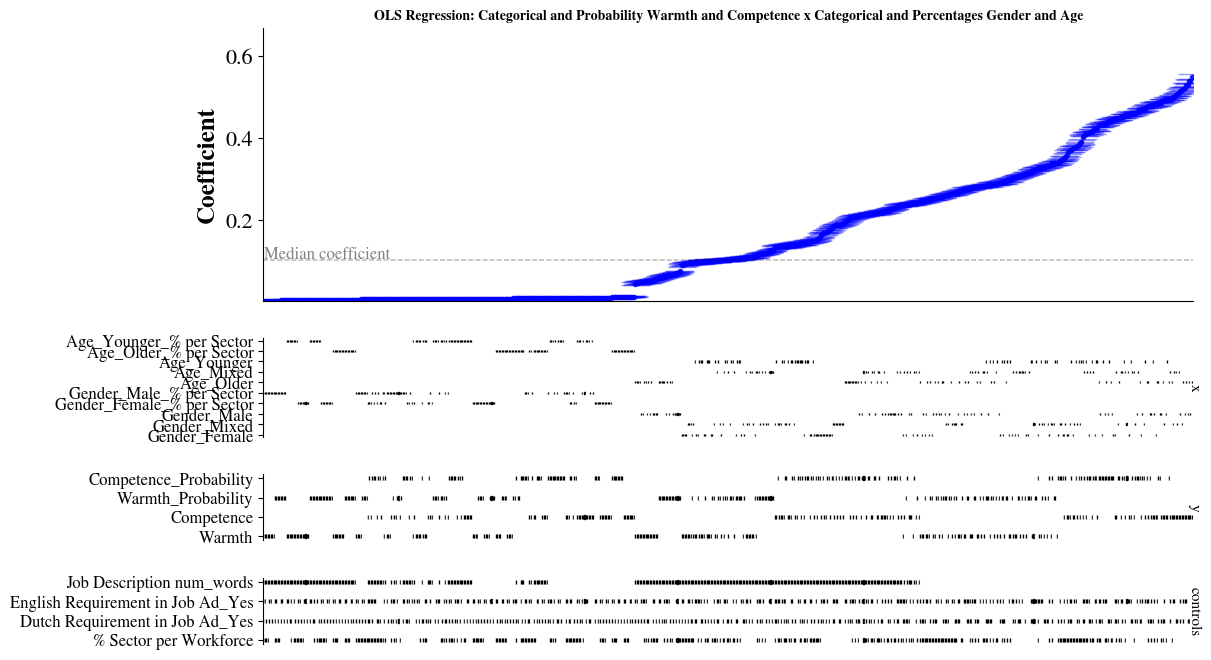

In [8]:
%%time
for (df_name, df), (model_name, model), (dvs_type, dvs_), (ivs_type, ivs_), (controls_type, controls_) in tqdm_product(dataframes.items(), sm_models.items(), dvs_for_spec.items(), ivs_for_spec.items(), controls_for_spec_dict.items()):

    # Set DVs and plot title prefix
    if df_name == 'df_manual':
        dvs_ = dvs
        dvs_type = 'binary'
        plot_title_prefix = 'Categorical Warmth and Competence x '

    if dvs_type == 'binary':
        plot_title_prefix = 'Categorical Warmth and Competence x '
    elif dvs_type == 'probability':
        plot_title_prefix = 'Probability Warmth and Competence x '
    elif dvs_type == 'binary and probability':
        plot_title_prefix = 'Categorical and Probability Warmth and Competence x '

    # Set IVs and plot title suffix
    if ivs_type == 'dummy':
        plot_title_suffix = 'Categorical Gender and Age'
    elif ivs_type == 'percentages':
        plot_title_suffix = 'Percentages Gender and Age'
    elif ivs_type == 'all':
        plot_title_suffix = 'Categorical and Percentages Gender and Age'

    # # Set controls
    # if controls_type == 'perc_words':
    #     plot_title_suffix += ' + % Sector per Workforce + Job Description num_words'
    # elif controls_type == 'perc_words_lang':
    #     plot_title_suffix += ' + % Sector per Workforce + Job Description num_words + Language Requirements'
    # elif controls_type == 'perc_words_lang_platform':
    #     plot_title_suffix += ' + % Sector per Workforce + Job Description num_words + Language Requirements + Platform'

    # Run specification curve analysis
    print('\n')
    print(f'{df_name} Running specification curve analysis with:\nDEPENDENT VARIABLES = {dvs_}\nINDEPENDENT VARIABLES = {ivs_}\nCONTROLS = {controls}')
    print(f'{"="*5} {df_name} {model_name.upper()} REGRESSION SPECIFICATION MODE RESULTS FOR {df_name} USING {dvs_type.upper()} x {ivs_type.upper()} + {controls_type.upper()} {"="*5}')
    print('\n')

    try:
        sc = specy.SpecificationCurve(df=df, y_endog=dvs_, x_exog=ivs_, controls=controls_)
        sc.fit(estimator=model)
        df_results = sc.df_r

        # Plot and save
        plot_title = f'{model_name}: {plot_title_prefix}{plot_title_suffix}'
        print('\n')
        print('~'*80)
        print(f'\n{"="*5} RESULTS FOR {plot_title} {"="*5}\n')
        print('~'*80)
        print('\n')

        for image_save_format in tqdm.tqdm(['eps', 'png', 'svg']):
            # Use following if not using forked specification_curve
            # sc.plot(preferred_spec=[iv, dv], save_path=save_path,)
            save_path = f'{plot_save_path}{df_name} - {model_name} Specification Curve - {dvs_type} Warmth and Competence x {ivs_type} Gender and Age + {controls_type}.{image_save_format}'
            sc_fig = sc.plot(
                save_path=save_path,
                show_plot=False,
                return_fig=True,
                plot_title=plot_title
            )

        # Get statsmodels results and save
        ## Get controls mask
        controls_mask = df_results['Specification'].apply(lambda x: all(control in x for control in controls_))
        ## Get gender only results
        gender_mask = df_results['Specification'].apply(lambda x: any(item for item in ivs_[:-len(ivs_)//2] if item in x and len(x) == 2))
        df_results_gender = df_results[gender_mask]
        if df_results_gender[controls_mask].empty:
            print('No specification with Gender and all controls.')
        else:
            df_results_gender = df_results_gender[controls_mask]
        # Get age only results
        age_mask = df_results['Specification'].apply(lambda x: any(item for item in ivs_[len(ivs_)//2:] if item in x and len(x) == 2))
        df_results_age = df_results[age_mask]
        if df_results_age[controls_mask].empty:
            print('No specification with Age and all controls.')
        else:
            df_results_age = df_results_age[controls_mask]

        for df in [df_results_gender, df_results_age]:
            for idx, row in df.iterrows():
                for dv_iv in row['Specification']:
                    if dv_iv in ivs_dummy_and_perc:
                        iv_name = dv_iv
                    elif dv_iv in dvs_:
                        dv_name = dv_iv
                print('\n')
                print('+'*20)
                print(f'{dv_name} x {iv_name}\n')
                print('+'*20)
                print(f'{row["Results"].summary()}')
                print('-'*20)

                # Save results to file
                df_to_save = pd.DataFrame(csv.reader(row['Results'].summary().as_csv().split('\n'), delimiter=','))
                df_to_save.to_csv(f'{table_save_path}{model_name} specification curve {df_name} - {dvs_type} Warmth and Competence x {ivs_type} Gender and Age + {controls_type}.csv')
                df_to_save.style.to_latex(f'{table_save_path}{model_name} specification curve {df_name} - {dvs_type} Warmth and Competence x {ivs_type} Gender and Age + {controls_type}.tex')

        # Top 10 significant highest coefficients
        df_coeff_p = df_results.loc[sc.df_r['coeff_pvals'] < 0.05].sort_values(by=['Coefficient'], ascending=False)
        print(f"Top 10 significant coefficients:\n{df_coeff_p[['x_exog', 'y_endog', 'coeff_pvals', 'Coefficient', 'conf_int', 'pvalues']].head(10)}")

    except(np.linalg.LinAlgError):
        print(f'Singular matrix when using {model_name} with {controls_type} + {dvs_type} x {ivs_type}')

    print(f'{"="*5} END OF RESULTS FOR {dvs_type.upper()} x {ivs_type.upper()} + {controls_type.upper()} {"="*5}')
    print('~'*80, '\n')
